In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Car_Insurance_Claim.csv')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
df.info(),

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

(None,)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.nunique()

ID                     10000
AGE                        4
GENDER                     2
RACE                       2
DRIVING_EXPERIENCE         4
EDUCATION                  3
INCOME                     4
CREDIT_SCORE            9018
VEHICLE_OWNERSHIP          2
VEHICLE_YEAR               2
MARRIED                    2
CHILDREN                   2
POSTAL_CODE                4
ANNUAL_MILEAGE            21
VEHICLE_TYPE               2
SPEEDING_VIOLATIONS       21
DUIS                       7
PAST_ACCIDENTS            15
OUTCOME                    2
dtype: int64

In [ ]:
df.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

In [ ]:
# mean imputation for missing values
df['CREDIT_SCORE'] = df['CREDIT_SCORE'].fillna(round(df['CREDIT_SCORE'].mean(), 0))
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna(round(df['ANNUAL_MILEAGE'].mean(), 0))

In [ ]:
df["VEHICLE_OWNERSHIP"]=df["VEHICLE_OWNERSHIP"].astype('str')
df["MARRIED"]=df["MARRIED"].astype('str')
df["CHILDREN"]=df["CHILDREN"].astype('str')
df["POSTAL_CODE"]=df["POSTAL_CODE"].astype('str')
df["OUTCOME"]=df["OUTCOME"].astype('str')

In [ ]:
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

In [ ]:
df = df.drop("ID", axis=1)

# Exploratory data analysis

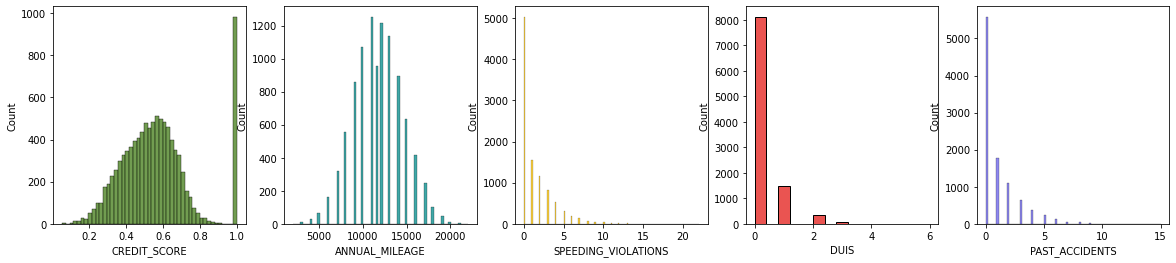

In [ ]:

Variables = ['CREDIT_SCORE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']
colour = ['#437C17','#008B8B','#F6BE00','#E41B17','#6960EC']

def plotHistPlot(columns):
    fig, ax = plt.subplots(len(columns)//5, 5,figsize=(20, 4 ))
    
    index = 0
 
    for i in range(5):
            sns.histplot(df.loc[:, columns[index]],
                         color=colour[i],
                         ax=ax[i])
            index += 1
plotHistPlot(Variables)

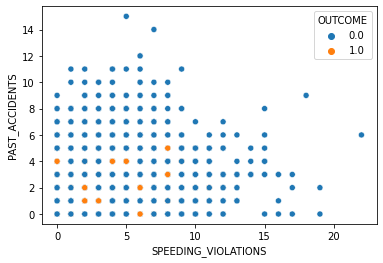

In [ ]:
sns.scatterplot(x='SPEEDING_VIOLATIONS', y='PAST_ACCIDENTS', data=df, hue='OUTCOME')

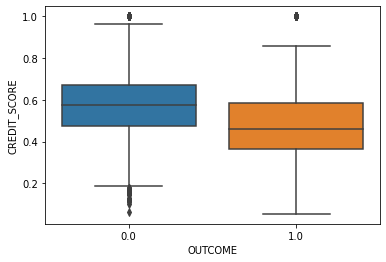

In [ ]:
sns.boxplot(x=df['OUTCOME'], y = df['CREDIT_SCORE'])

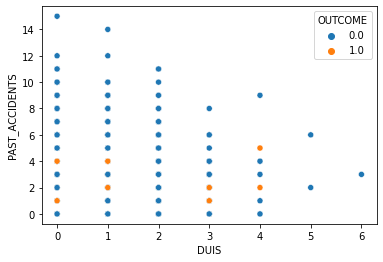

In [ ]:
sns.scatterplot(x='DUIS', y='PAST_ACCIDENTS', data=df, hue='OUTCOME')

In [ ]:
df.columns

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE', 'ANNUAL_MILEAGE', 'VEHICLE_TYPE',
       'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [ ]:
df['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

[Text(0.5, 1.0, 'Outcome Distribution')]

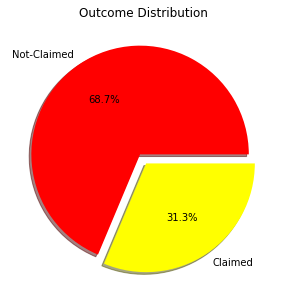

In [ ]:
fig, (ax2) = plt.subplots(nrows=1,ncols=1, figsize=(15,5))

ax2.pie(df["OUTCOME"].value_counts(),colors=["red", "yellow"],
        labels= ["Not-Claimed", "Claimed"] , 
        autopct='%1.1f%%',explode=[0.05,0.05] ,startangle=0, shadow = True)
ax2.set(title="Outcome Distribution")

In [ ]:
Variables = ['AGE', 'GENDER', 'RACE','DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME','VEHICLE_OWNERSHIP', 'VEHICLE_YEAR', 'MARRIED',
       'CHILDREN', 'POSTAL_CODE','VEHICLE_TYPE','OUTCOME']


In [ ]:
cross_tab_prop = pd.crosstab(index=df['OUTCOME'],
                             columns=df['GENDER'],
                             normalize="index")
cross_tab_prop

cross_tab = pd.crosstab(index=df['OUTCOME'],
                        columns=df['GENDER'])
cross_tab


GENDER,female,male
OUTCOME,,
0.0,3689,3178
1.0,1321,1812


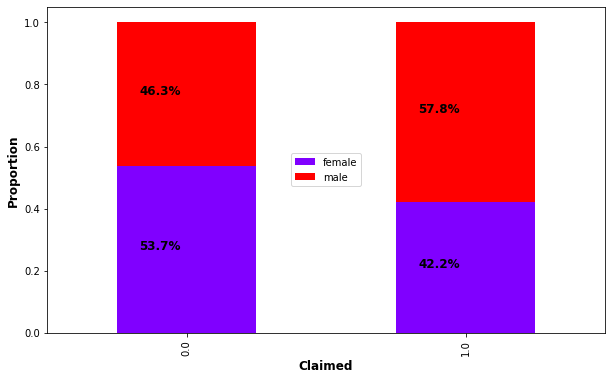

In [ ]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='rainbow', 
                    figsize=(10, 6))

plt.legend(loc="center",ncol=1)
plt.xlabel("Claimed",fontweight="bold",fontsize=12)
plt.ylabel("Proportion",fontweight="bold",fontsize=12)

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
plt.show()

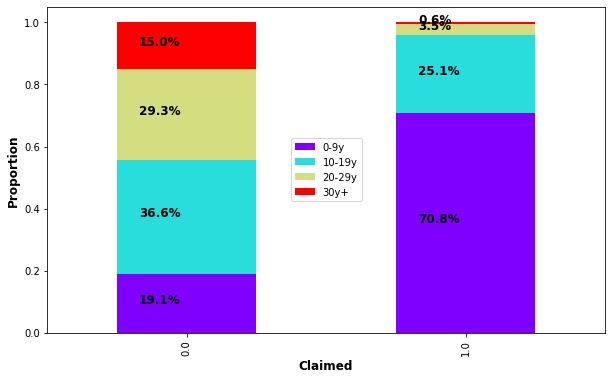

In [ ]:
cross_tab_prop = pd.crosstab(index=df['OUTCOME'],
                             columns=df['DRIVING_EXPERIENCE'],
                             normalize="index")
cross_tab_prop

cross_tab = pd.crosstab(index=df['OUTCOME'],
                        columns=df['DRIVING_EXPERIENCE'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='rainbow', 
                    figsize=(10, 6))

plt.legend(loc="center",ncol=1)
plt.xlabel("Claimed",fontweight="bold",fontsize=12)
plt.ylabel("Proportion",fontweight="bold",fontsize=12)

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
plt.show()

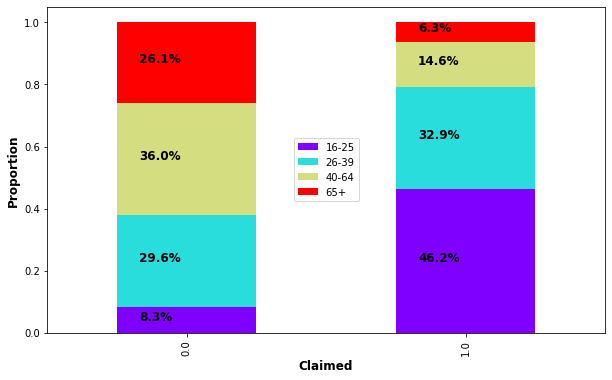

In [ ]:
cross_tab_prop = pd.crosstab(index=df['OUTCOME'],
                             columns=df['AGE'],
                             normalize="index")
cross_tab_prop

cross_tab = pd.crosstab(index=df['OUTCOME'],
                        columns=df['AGE'])

cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='rainbow', 
                    figsize=(10, 6))

plt.legend(loc="center",ncol=1)
plt.xlabel("Claimed",fontweight="bold",fontsize=12)
plt.ylabel("Proportion",fontweight="bold",fontsize=12)

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")
plt.show()

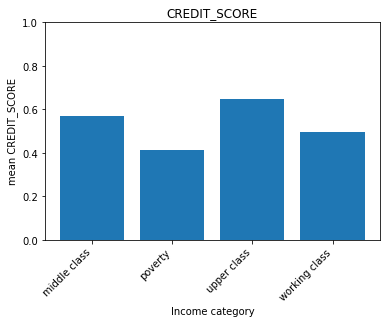

In [ ]:
sub_set = df.groupby('INCOME')[['CREDIT_SCORE']].mean()

fig, ax = plt.subplots()

ax.bar(sub_set.index, sub_set['CREDIT_SCORE'])

labels = ax.get_xticklabels()
plt.setp(labels, rotation = 45, horizontalalignment = 'right')

plt.title('CREDIT_SCORE')
plt.xlabel('Income category')
plt.ylabel('mean CREDIT_SCORE')
plt.ylim(0, 1)
plt.show()

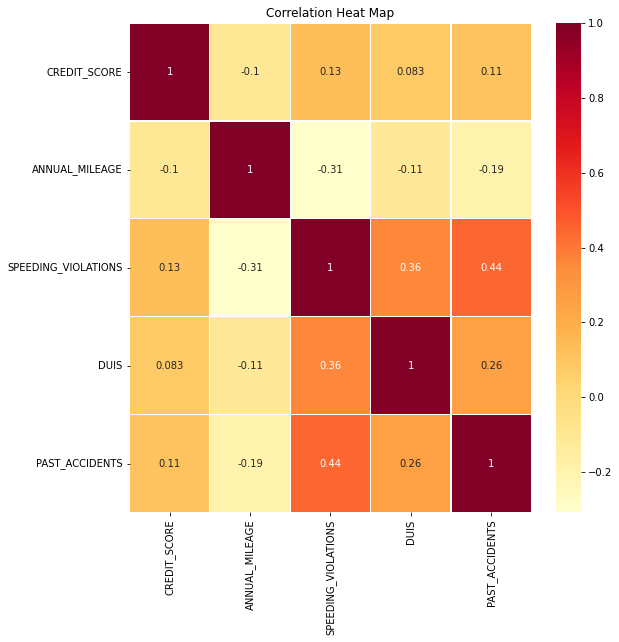

In [ ]:
# correlation map 
qut_data=df[[ 'CREDIT_SCORE','ANNUAL_MILEAGE','SPEEDING_VIOLATIONS','DUIS','PAST_ACCIDENTS']]
#Showing the correlation.

plt.figure(figsize=(9, 9))
sns.heatmap(qut_data.corr(), annot=True, cmap="YlOrRd", linewidths=0.1, annot_kws={"fontsize":10})
plt.title("Correlation Heat Map");


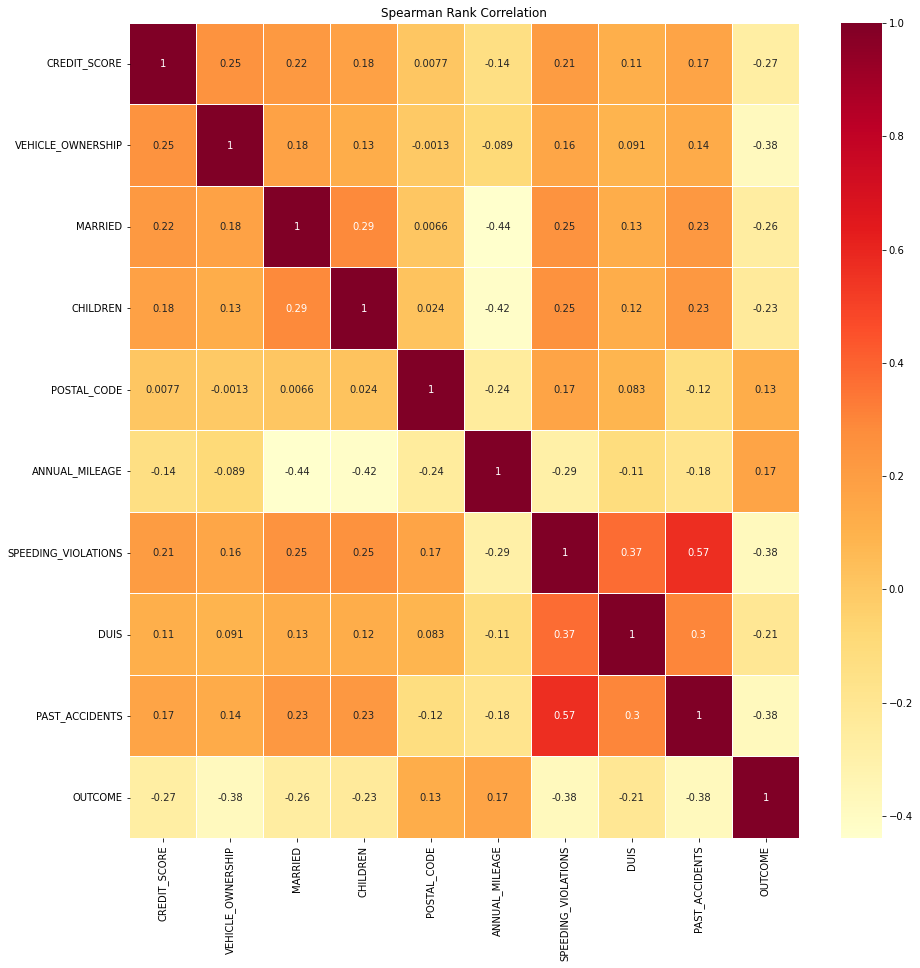

In [ ]:
# spearman rank correlation


corr = df.corr(method = 'spearman')


plt.figure(figsize=(15, 15))
sns.heatmap(corr, annot=True, cmap="YlOrRd", linewidths=0.1, annot_kws={"fontsize":10})
plt.title("Spearman Rank Correlation");



# Advanced analysis

In [ ]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
# Label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
df.GENDER = le.fit_transform(df.GENDER)
df.RACE = le.fit_transform(df.RACE)
df.VEHICLE_YEAR = le.fit_transform(df.VEHICLE_YEAR)
df.VEHICLE_TYPE = le.fit_transform(df.VEHICLE_TYPE)


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# encoding ordinal categorical variables
import category_encoders as ce
encoder_AGE= ce.OrdinalEncoder(cols=['AGE'],return_df=True,
                           mapping=[{'col':'AGE',
'mapping':{'16-25':1,'26-39':2,'40-64':3,'65+':4}}])
df = encoder_AGE.fit_transform(df)

encoder_EDUCATION= ce.OrdinalEncoder(cols=['EDUCATION'],return_df=True,
                           mapping=[{'col':'EDUCATION',
'mapping':{'none':0,'high school':1,'university':2}}])
df = encoder_EDUCATION.fit_transform(df)

import category_encoders as ce
encoder_DRIVING_EXPERIENCE= ce.OrdinalEncoder(cols=['DRIVING_EXPERIENCE'],return_df=True,
                           mapping=[{'col':'DRIVING_EXPERIENCE',
'mapping':{'0-9y':1,'10-19y':2,'20-29y':3,'30y+':4}}])
df = encoder_DRIVING_EXPERIENCE.fit_transform(df)


import category_encoders as ce
encoder_INCOME= ce.OrdinalEncoder(cols=['INCOME'],return_df=True,
                           mapping=[{'col':'INCOME',
'mapping':{'poverty':1,'working class':2,'middle class':3,'upper class':4}}])
df = encoder_INCOME.fit_transform(df)

In [ ]:
df.head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,4,0,0,1,1,4,0.629027,1.0,0,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,1,1,0,1,0,1,0.357757,0.0,1,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,1,0,0,1,1,2,0.493146,1.0,1,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,1,1,0,1,2,2,0.206013,1.0,1,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,2,1,0,2,0,2,0.388366,1.0,1,0.0,0.0,32765,12000.0,0,2,0,1,1.0


# Feature selection

In [ ]:
X = df.drop('OUTCOME', axis=1)
y = df['OUTCOME']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

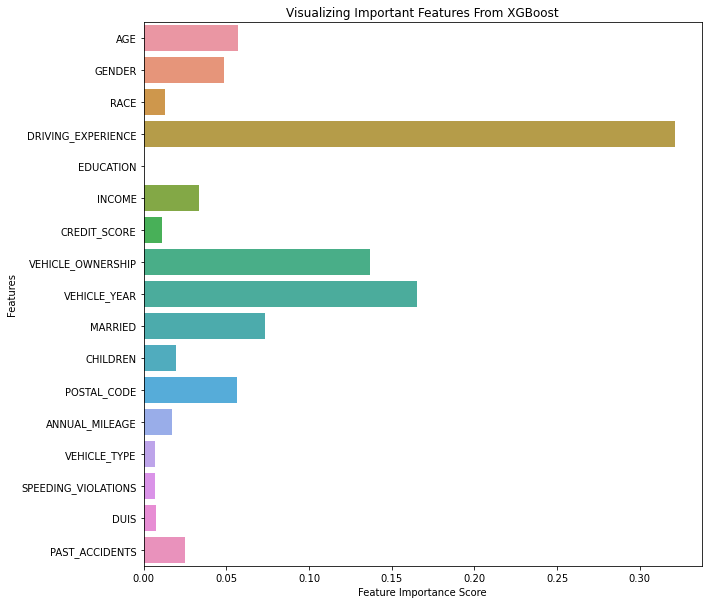

In [ ]:
plt.figure(figsize=(10, 10))
import xgboost
from xgboost import XGBClassifier
xgboost =XGBClassifier()
xgboost.fit(X,y)
feature_imp2 = xgboost.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From XGBoost")
plt.show()

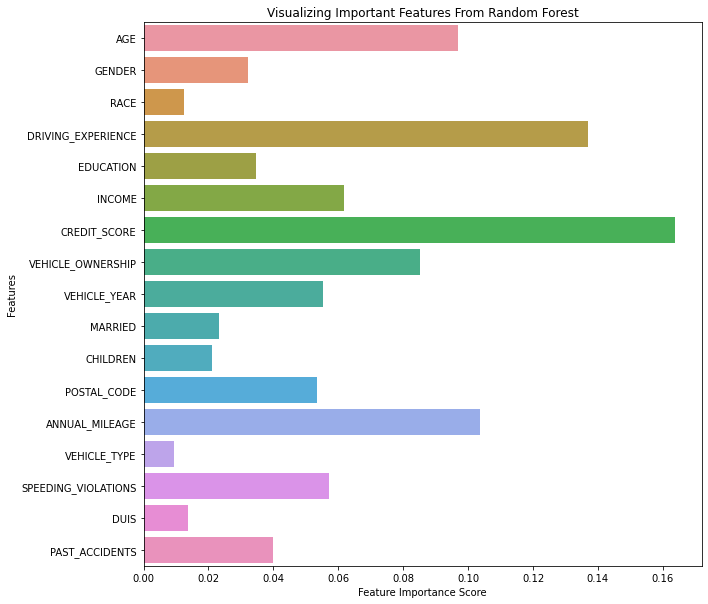

In [ ]:
plt.figure(figsize=(10, 10))
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
feature_imp2 = rf.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From Random Forest")
plt.show()

# Model Building

In [ ]:
X = df.drop(['OUTCOME'], axis=1)
y = df['OUTCOME']

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scale, y_train)

y_pred = classifier.predict(X_test_scale)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1125  254]
 [ 205 1163]]


0.8329086275937386

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#n_neighbors- no of points we consider near the new point,metric ='minkowski' and p=2 better be this value to apply euclidean distance 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1057  322]
 [ 108 1260]]


0.8434655988350929

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scale, y_train)

y_pred = classifier.predict(X_test_scale)

cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[ 999  380]
 [ 216 1152]]


0.783036039315617

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1146  233]
 [ 214 1154]]


0.8372770294867128

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1187  192]
 [ 137 1231]]


0.880232981434292

In [ ]:
from xgboost import XGBClassifier
xgboost =XGBClassifier()
xgboost.fit(X_train,y_train)

y_pred = xgboost.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1165  214]
 [ 133 1235]]


0.8736803785948307

## Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [ ]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())

strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [4390 4399], Accuracy: 0.884
Fold:  2, Training/Test Split Distribution: [4390 4399], Accuracy: 0.877
Fold:  3, Training/Test Split Distribution: [4390 4400], Accuracy: 0.887
Fold:  4, Training/Test Split Distribution: [4391 4399], Accuracy: 0.873
Fold:  5, Training/Test Split Distribution: [4391 4399], Accuracy: 0.865


Cross-Validation accuracy: 0.877 +/- 0.008


In [ ]:
pipeline = make_pipeline(StandardScaler(), XGBClassifier())

strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [4390 4399], Accuracy: 0.885
Fold:  2, Training/Test Split Distribution: [4390 4399], Accuracy: 0.872
Fold:  3, Training/Test Split Distribution: [4390 4400], Accuracy: 0.879
Fold:  4, Training/Test Split Distribution: [4391 4399], Accuracy: 0.870
Fold:  5, Training/Test Split Distribution: [4391 4399], Accuracy: 0.860


Cross-Validation accuracy: 0.873 +/- 0.009


In [ ]:
pipeline = make_pipeline(StandardScaler(), LogisticRegression())

strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [4390 4399], Accuracy: 0.840
Fold:  2, Training/Test Split Distribution: [4390 4399], Accuracy: 0.833
Fold:  3, Training/Test Split Distribution: [4390 4400], Accuracy: 0.845
Fold:  4, Training/Test Split Distribution: [4391 4399], Accuracy: 0.829
Fold:  5, Training/Test Split Distribution: [4391 4399], Accuracy: 0.829


Cross-Validation accuracy: 0.835 +/- 0.006


In [ ]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())

strtfdKFold = StratifiedKFold(n_splits=5)
kfold = strtfdKFold.split(X_train, y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    pipeline.fit(X_train.iloc[train, :], y_train.iloc[train])
    score = pipeline.score(X_train.iloc[test, :], y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, np.bincount(y_train.iloc[train]), score))
 
print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

Fold:  1, Training/Test Split Distribution: [4390 4399], Accuracy: 0.833
Fold:  2, Training/Test Split Distribution: [4390 4399], Accuracy: 0.828
Fold:  3, Training/Test Split Distribution: [4390 4400], Accuracy: 0.828
Fold:  4, Training/Test Split Distribution: [4391 4399], Accuracy: 0.823
Fold:  5, Training/Test Split Distribution: [4391 4399], Accuracy: 0.817


Cross-Validation accuracy: 0.826 +/- 0.005


## Hyperparameter tuning

In [ ]:
parameters ={#'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion' : ['gini', 'entropy'],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     #'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400,600]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = RandomForestClassifier()
grid_search = GridSearchCV(
    grid_search, 
    parameters, 
    cv=2,
    scoring='accuracy',n_jobs=-1)

In [ ]:
grid_result= grid_search.fit(X_train, y_train)